In [15]:
import random
random.seed(15891393) # N15891393

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
'''
    Reading in movieTitles.csv into a pandas 
    dataframe and formating it
'''
columnNames = {0:'id', 1:'release_date', 2:'title'}
movies = pd.read_csv('dataSet/movieTitles.csv', header=None) # read first row as data and not as the column names
movies.drop([3,4], axis=1, inplace=True) # remove empty columns at index 3 and 4
movies.rename(columns=columnNames, inplace=True) # giving each column a name that represents the column data
movies.set_index(movies['id'], inplace=True) # set the movie id to be the row index values
movies.drop(['id'], axis=1, inplace=True) # remove the original column that contained id values

In [4]:
movies.head() # overview of movieTitles.csv

,release_date,title
id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [5]:
movies.isna().sum() # number of rows with empty data in each respective column

release_date    2
title           0
dtype: int64

In [6]:
movies.dtypes # column data types

release_date    float64
title            object
dtype: object

In [7]:
movies.shape # 5000 total movie titles

(5000, 2)

In [8]:
'''
    Reading in data.txt and parsing it into dictionaries of 
    dictionaries with proper formatting. The dictionary of 
    dictionaries is then converted into a pandas dataframe
'''
userRatings = dict() 
"""
    dictionary holding all users ratings for each movie 
    format -> {
                movie_id: {
                            user_id: rating, 
                            user_id: rating...
                          },
                movie_id: {
                            user_id: rating, 
                            user_id: rating...
                          },
                ...
              }
 """
prev_movie_id = 0 # temporary value to prevent not defined error

with open('dataSet/data.txt') as data:
    for line in data: # reading each line in the data.txt file
        if line[-1] == '\n' and line[-2] == ':': # Accessing rows which are movie id's
            movie_id = int(line[0:-2]) # indexing movie id to not include ':' and '\n', and convert from str to int
        else:
            userData = line.split(',') # splitting lines that provide id, ratings, and date information
            userData[-1] = userData[-1][:-1] # removing '\n' from date
            
            user_id = int(userData[0]) # accessing current line's user_id value
            rating = userData[1] # accessing current line's rating value given by user_id for movie_id
            date = userData[2] # accessing current line's date value for user_id for movie_id
            
            if prev_movie_id == movie_id:               # if movie_id key exists inside outer dictionary 
                userRatings[movie_id][user_id] = rating # then simply append a new user_id key along with the rating value in the 
                                                        # inner dictionary 
            else:
                userRatings[movie_id] = {user_id: rating} # if movie_id key does not exist inside outer dictionary then initialize the 
                                                          # the new movie_id key for the outer dictionary and initialize the 
                                                          # inner dictionary that will hold each user_id's rating for that movie_id
                
            prev_movie_id = movie_id # used to check if a new movie_id value is detected in order to append new key to the outer dictionary
      

In [9]:
data.close()

In [10]:
movie_ratings = pd.DataFrame(userRatings) 

In [11]:
#movie_ratings.to_csv('dataSet/ratings.csv') # downloading the pandas dataframe into a csv file

In [12]:
movie_ratings.head() # overview of ratings given per user per movie

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
1488844,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
822109,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
885013,4,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30878,4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
823519,3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


In [13]:
movie_ratings.shape # 472542 total users

(472542, 5000)

In [14]:
'''
    This section is for ratings that are not available
'''
missing_rating = movie_ratings.isna().sum() # number of missing ratings a movie has
missing_rating

1       471995
2       472397
3       470530
4       472400
5       471402
         ...  
4996    320695
4997    472373
4998    472140
4999    472100
5000    471650
Length: 5000, dtype: int64

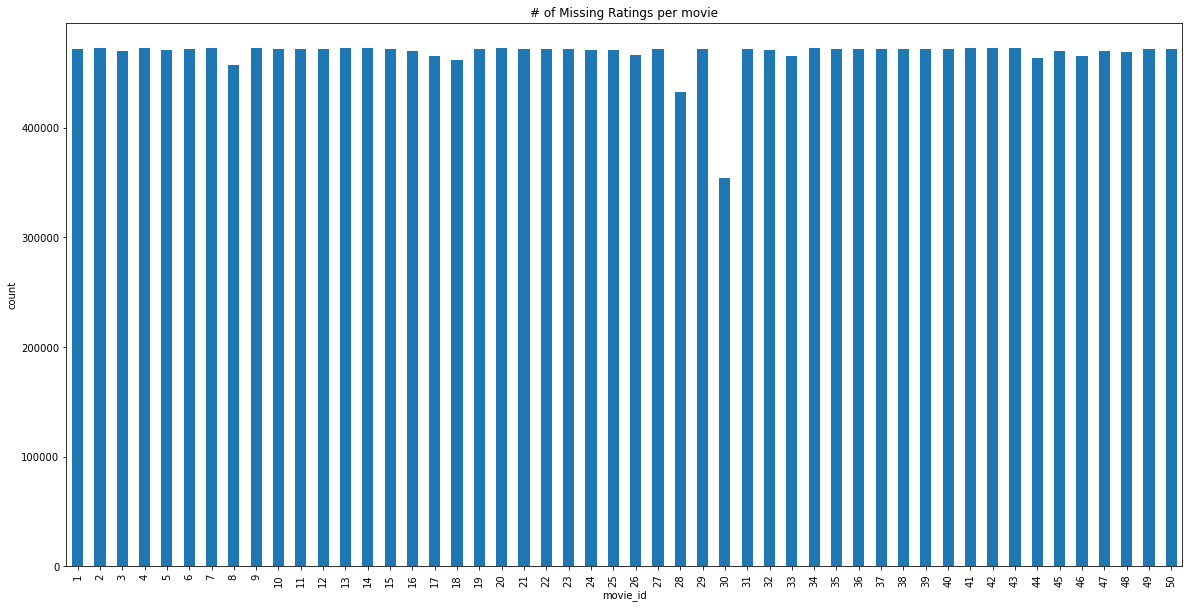

In [15]:
plot1 = missing_rating[:50].plot(kind='bar', rot=90, figsize=(20, 10), title='# of Missing Ratings per movie')
plot1.set_xlabel("movie_id")
plot1.set_ylabel("count")
plt.show()

In [16]:
sum(missing_rating) # total number of missing ratings for all movies combined (~2 billion)

2335699775

In [17]:
missing_rating.max() # the movie with the most amount of missing data has 472529 missing ratings

472529

In [18]:
missing_rating.describe() # summary statistics about # of missing ratings

count      5000.000000
mean     467139.955000
std       16260.702786
min      278601.000000
25%      469985.750000
50%      471994.000000
75%      472351.000000
max      472529.000000
dtype: float64

In [19]:
least_ratings_id = missing_rating[missing_rating == 472529].index # the movie_id of the movie with the most # of missing ratings
movies.iloc[least_ratings_id]['title'] # title of the movie

id
4807    The Many Faces of Zorro
Name: title, dtype: object

In [20]:
missing_rating[missing_rating > 467139] # movies that have # of missing ratings above the mean # number of missing ratings

1       471995
2       472397
3       470530
4       472400
5       471402
         ...  
4994    472439
4997    472373
4998    472140
4999    472100
5000    471650
Length: 4177, dtype: int64

In [21]:
'''
    This section is for ratings that are available
'''
not_missing_rating = movie_ratings.notna().sum() # number of ratings a movie has
not_missing_rating

1          547
2          145
3         2012
4          142
5         1140
         ...  
4996    151847
4997       169
4998       402
4999       442
5000       892
Length: 5000, dtype: int64

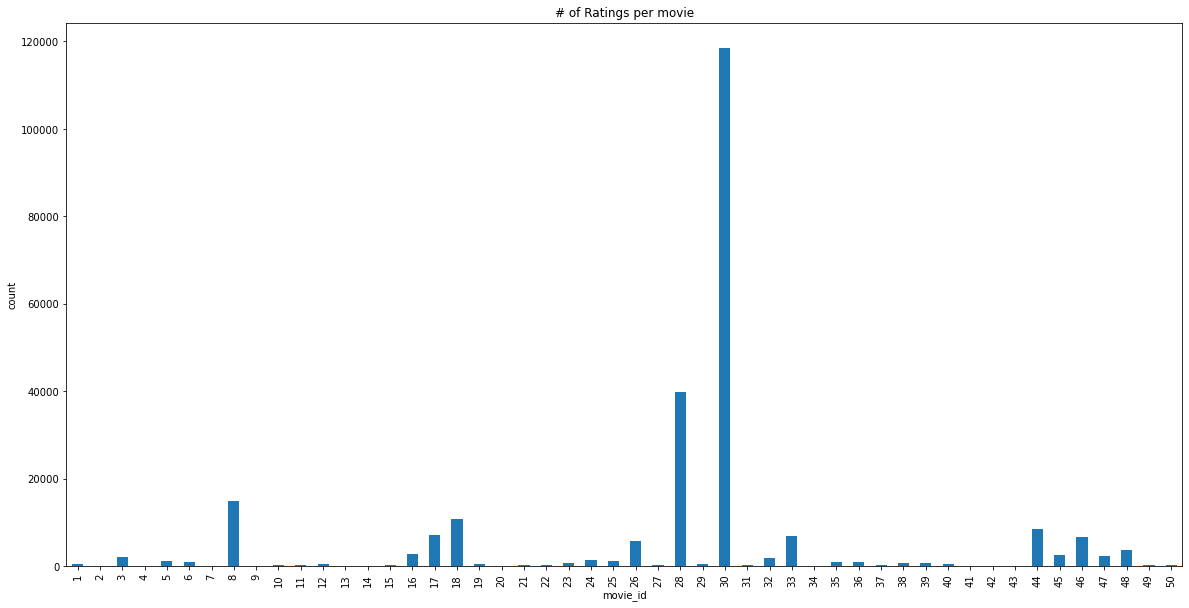

In [22]:
plot2 = not_missing_rating[:50].plot(kind='bar', rot=90, figsize=(20, 10), title='# of Ratings per movie')
plot2.set_xlabel("movie_id")
plot2.set_ylabel("count")
plt.show()

In [23]:
sum(not_missing_rating) # total number of ratings for all movies combined (~27 million)

27010225

In [24]:
not_missing_rating.max() # the movie with the most amount of ratings has 193941 ratings

193941

In [25]:
not_missing_rating.describe() # summary statistics about # of ratings

count      5000.000000
mean       5402.045000
std       16260.702786
min          13.000000
25%         191.000000
50%         548.000000
75%        2556.250000
max      193941.000000
dtype: float64

In [26]:
most_ratings_id = not_missing_rating[not_missing_rating == 193941].index # movie_id of movie with the most # of ratings
movies.iloc[most_ratings_id]['title'] # movie title

id
1906    The Knights Templar
Name: title, dtype: object

In [27]:
not_missing_rating[not_missing_rating > 5402] # movies that have # of ratings above the mean # number of ratings

8        14910
17        7108
18       10722
26        5861
28       39752
         ...  
4972     97491
4977     35088
4978      8211
4995      8654
4996    151847
Length: 823, dtype: int64

In [28]:
'''
    Determining most active user in terms of giving ratings
'''

user_num_ratings = movie_ratings.notnull().sum(axis=1) # user_id and their total number of ratings given
user_num_ratings

1488844    600
822109      41
885013      96
30878      351
823519     177
          ... 
543531       1
927712       1
2450881      1
2639985      1
325204       1
Length: 472542, dtype: int64

In [29]:
user_num_ratings.describe()

count    472542.000000
mean         57.159417
std          83.403879
min           1.000000
25%          10.000000
50%          27.000000
75%          72.000000
max        4963.000000
dtype: float64

In [30]:
user_num_ratings[user_num_ratings==4963].index # user_id 305344 has the most number of ratings given (most active)

Int64Index([305344], dtype='int64')

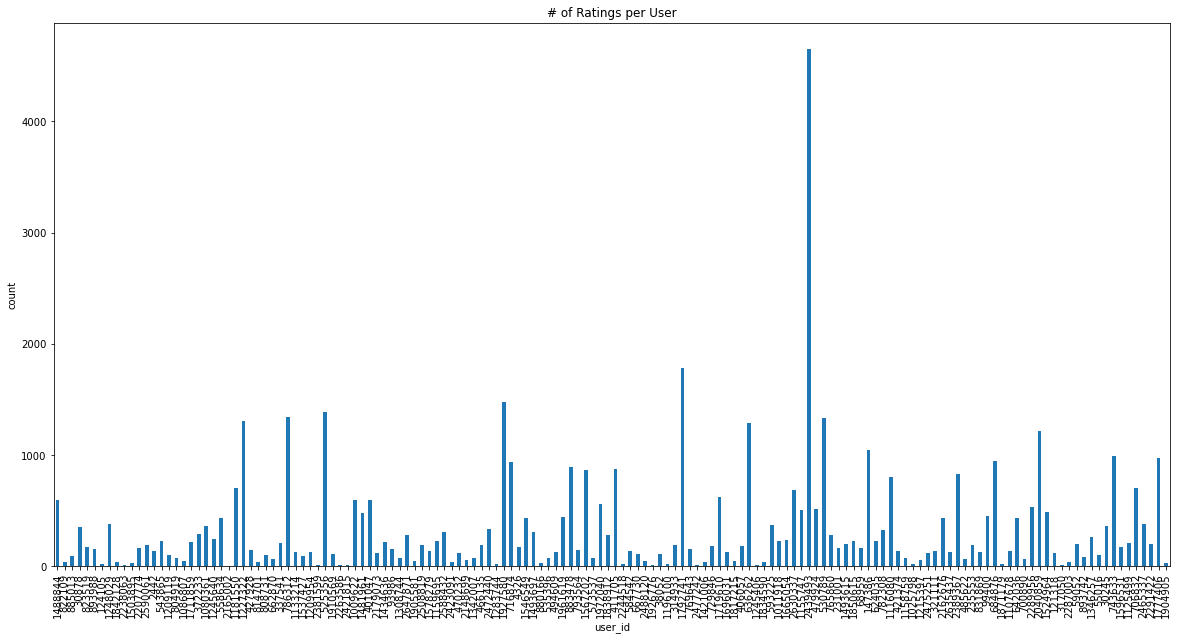

In [31]:
plot3 = user_num_ratings[:150].plot(kind='bar', figsize=(20,10), title='# of Ratings per User')
plot3.set_xlabel("user_id")
plot3.set_ylabel("count")
plt.show()

In [32]:
user_num_ratings[user_num_ratings>57] # user_id and their total number of ratings given if they are above 57

1488844    600
885013      96
30878      351
823519     177
893988     157
          ... 
1010339     63
605364      74
952371      60
2076092     63
696981      59
Length: 143502, dtype: int64

In [33]:
'''
    Building new dataset that has only user_id's that have more than 57 ratings given to movies and replacing NaN values
'''

most_ratings_id = user_num_ratings[user_num_ratings>57].index # user_id of users that gave more than 57 ratings 

In [34]:
new_movie_ratings = movie_ratings.loc[most_ratings_id]
#new_movie_ratings.to_csv('dataSet/new_ratings.csv') # downloading the pandas dataframe into a csv file
new_movie_ratings

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
1488844,3,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
885013,4,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30878,4,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
823519,3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
893988,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN
605364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN
952371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2076092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN


In [35]:
new_movie_ratings = new_movie_ratings.astype(float) # converted to float in order to be able to calculate mean
new_movie_ratings

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
1488844,3.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
885013,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30878,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
823519,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
893988,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
605364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
952371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2076092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [36]:
med_df = new_movie_ratings.median()
med_df

1       4.0
2       4.0
3       4.0
4       2.0
5       4.0
       ... 
4996    3.0
4997    2.0
4998    3.0
4999    3.0
5000    3.0
Length: 5000, dtype: float64

In [37]:
med_df.describe()

count    5000.000000
mean        3.244300
std         0.670789
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
dtype: float64

In [38]:
min_df = new_movie_ratings.min()
min_df

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
4996    1.0
4997    1.0
4998    1.0
4999    1.0
5000    1.0
Length: 5000, dtype: float64

In [39]:
min_df.describe()

count    5000.000000
mean        1.001000
std         0.042419
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
dtype: float64

In [40]:
mean_df = new_movie_ratings.mean().round() # average rating for each of the 5000 movies rounded
mean_df

1       4.0
2       3.0
3       4.0
4       3.0
5       4.0
       ... 
4996    3.0
4997    2.0
4998    3.0
4999    3.0
5000    3.0
Length: 5000, dtype: float64

In [41]:
mean_df.describe()

count    5000.000000
mean        3.185400
std         0.604897
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
dtype: float64

In [42]:
for column in new_movie_ratings:
    new_movie_ratings[column].replace(np.nan, min_df.loc[column], inplace=True)
    
new_movie_ratings

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
1488844,3.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
885013,4.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30878,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
823519,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
893988,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010339,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
605364,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
952371,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2076092,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0


In [48]:
new_movie_ratings.to_csv('dataSet/new_ratings.csv') # downloading the pandas dataframe into a csv file

In [2]:
new_movie_ratings = pd.read_csv('dataSet/new_ratings.csv', index_col=[0])

In [10]:
new_movie_ratings.head()

,1,2,3,4,5,6,7,8,9,10,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1488844,3.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
885013,4.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30878,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
823519,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0
893988,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [47]:
'''
    Selecting random ratings per movie for test_set based on random seed
    and doing train test split
'''


userIDs = new_movie_ratings.index
test_user = random.choice(userIDs)
print(test_user)

180687


In [48]:
new_movie_ratings.loc[test_user].notna().sum() # user 180687 has 5000 ratings now, meaning no more missing values

5000

In [49]:
test_set = new_movie_ratings.loc[test_user]
train_set = new_movie_ratings.drop(test_user, axis=0)
print(test_set)
print(train_set)

1       1.0
2       1.0
3       1.0
4       1.0
5       1.0
       ... 
4996    3.0
4997    1.0
4998    1.0
4999    1.0
5000    1.0
Name: 180687, Length: 5000, dtype: float64
              1    2    3    4    5    6    7    8    9   10  ...  4991  4992  \
Unnamed: 0                                                    ...               
1488844     3.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0  1.0  ...   1.0   1.0   
885013      4.0  1.0  1.0  1.0  5.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
30878       4.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
823519      3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
893988      3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
1010339     1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
605364      1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
952371      1.0

In [50]:
x_test = test_set.name
y_test = test_set[:]

x_train = train_set.index
y_train = train_set[:][:]

In [51]:
'''
    Building Linear Regression Model
'''
lin_reg = LinearRegression().fit(x_train.array.reshape(-1, 1), y_train)

In [59]:
y_pred = lin_reg.predict(x_test.reshape(-1, 1))
#print(y_pred.reshape(-1, 1))
#print(y_test.array.reshape(-1, 1))
rmse = mean_squared_error(y_test.array.reshape(-1, 1), y_pred.reshape(-1, 1), squared=False)
print(rmse)

0.41825324894799154


In [66]:
y_pred = lin_reg.predict(x_train.array.reshape(-1, 1))
print(y_pred)
print(y_train[:][:])
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(rmse)

[[1.00720592 1.00129    1.02761854 ... 1.00458009 1.0046396  1.01183112]
 [1.00807801 1.00136197 1.02788587 ... 1.00439921 1.00504422 1.01176179]
 [1.00931162 1.00146377 1.02826402 ... 1.00414336 1.00561657 1.01166372]
 ...
 [1.00798073 1.00135394 1.02785605 ... 1.00441939 1.00499908 1.01176953]
 [1.00635777 1.00122001 1.02735855 ... 1.004756   1.00424609 1.01189855]
 [1.00834958 1.00138438 1.02796912 ... 1.00434289 1.00517022 1.0117402 ]]
              1    2    3    4    5    6    7    8    9   10  ...  4991  4992  \
Unnamed: 0                                                    ...               
1488844     3.0  1.0  1.0  1.0  1.0  1.0  1.0  4.0  1.0  1.0  ...   1.0   1.0   
885013      4.0  1.0  1.0  1.0  5.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
30878       4.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
823519      3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.0   1.0   
893988      3.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...   1.